In [5]:
import duckdb
import pandas as pd
from statsbombpy import sb

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [6]:
con = duckdb.connect("laliga.db")


In [7]:
fouls = con.execute("SELECT * FROM events WHERE type = 'Foul Won'").df()

## **Creating Foul Networks**

In [8]:

columnsf = [
    "match_id",
    "competition",
    "home_team",
    "home_score",
    "away_team",
    "away_score",
    "referee",
    "team",
    "possession",
    "possession_time",
    "minute",
    "timestamp",
    "player",
    "position",
    "position_most_played",
    "x",
    "y",
    "type_foul_commitedJ",
    "player_foul_commitedJ",
    "position_foul_commitedJ",
    "team_foul_commitedJ",
    "foul_committed_advantage_foul_commitedJ",
    "foul_committed_card_foul_commitedJ",
]

fdf=fouls[columnsf]
fdf

match_id      competition   home_team  home_score away_team  \
0       3825848  Spain - La Liga  Levante UD           2     Eibar   
1       3825848  Spain - La Liga  Levante UD           2     Eibar   
2       3825848  Spain - La Liga  Levante UD           2     Eibar   
3       3825848  Spain - La Liga  Levante UD           2     Eibar   
4       3825848  Spain - La Liga  Levante UD           2     Eibar   
...         ...              ...         ...         ...       ...   
11569    266557  Spain - La Liga   Barcelona           1  Valencia   
11570    266557  Spain - La Liga   Barcelona           1  Valencia   
11571    266557  Spain - La Liga   Barcelona           1  Valencia   
11572    266557  Spain - La Liga   Barcelona           1  Valencia   
11573    266557  Spain - La Liga   Barcelona           1  Valencia   

       away_score                   referee        team  possession  \
0               2                      None  Levante UD          10   
1               2                      None       Eibar          12   
2               2                      None       Eibar          29   
3               2                      None  Levante UD          31   
4               2                      None  Levante UD          36   
...           ...                       ...         ...         ...   
11569           2  David Fernández Borbalan   Barcelona         147   
11570           2  David Fernández Borbalan    Valencia         155   
11571           2  David Fernández Borbalan   Barcelona         158   
11572           2  David Fernández Borbalan    Valencia         169   
11573           2  David Fernández Borbalan   Barcelona         177   

       possession_time  ...                   position  \
0               16.613  ...                Center Back   
1               15.037  ...    Left Defensive Midfield   
2                4.279  ...                  Left Back   
3                5.858  ...        Left Center Forward   
4               18.309  ...      Right Center Midfield   
...                ...  ...                        ...   
11569            5.032  ...                  Left Back   
11570           54.213  ...              Left Midfield   
11571           10.282  ...  Center Defensive Midfield   
11572            4.204  ...             Right Midfield   
11573           27.059  ...                  Left Wing   

            position_most_played     x     y type_foul_commitedJ  \
0                    Center Back   6.3  44.2      Foul Committed   
1        Left Defensive Midfield  57.8  67.3      Foul Committed   
2                      Left Back  40.5  32.3      Foul Committed   
3            Left Center Forward  54.2  54.5      Foul Committed   
4          Right Center Midfield  43.7  56.0      Foul Committed   
...                          ...   ...   ...                 ...   
11569                  Left Back  35.2  28.5      Foul Committed   
11570             Right Midfield  14.4  26.5      Foul Committed   
11571  Center Defensive Midfield  50.9  16.2      Foul Committed   
11572             Right Midfield  16.5  75.5      Foul Committed   
11573                  Left Wing  82.1  39.4      Foul Committed   

               player_foul_commitedJ    position_foul_commitedJ  \
0               Borja González Tomás             Center Forward   
1           Víctor Casadesús Castaño        Left Center Forward   
2                       Nabil Ghilas       Right Center Forward   
3                  Gonzalo Escalante   Right Defensive Midfield   
4                       Takashi Inui                  Left Wing   
...                              ...                        ...   
11569      João Pedro Cavaco Cancelo       Left Center Midfield   
11570                   Ivan Rakitić      Right Center Midfield   
11571          Javier Fuego Martínez  Center Defensive Midfield   
11572  Neymar da Silva Santos Junior                  Left Wing   
11573     André Filipe Tavares Gomes       Left Center Midfiel

In [9]:
fdf['Yellow Card'] = (fdf['foul_committed_card_foul_commitedJ'] == 'Yellow Card').astype(int)
fdf['Second Yellow'] = (fdf['foul_committed_card_foul_commitedJ'] == 'Second Yellow').astype(int)
fdf['Red Card'] = (fdf['foul_committed_card_foul_commitedJ'] == 'Red Card').astype(int)
fdf.head(10)

/var/folders/6j/1nsywzcs1v5_6gn_3972hssr0000gn/T/ipykernel_7254/2490473267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['Yellow Card'] = (fdf['foul_committed_card_foul_commitedJ'] == 'Yellow Card').astype(int)
/var/folders/6j/1nsywzcs1v5_6gn_3972hssr0000gn/T/ipykernel_7254/2490473267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['Second Yellow'] = (fdf['foul_committed_card_foul_commitedJ'] == 'Second Yellow').astype(int)
/var/folders/6j/1nsywzcs1v5_6gn_3972hssr0000gn/T/ipykernel_7254/24

match_id      competition   home_team  home_score away_team  away_score  \
0   3825848  Spain - La Liga  Levante UD           2     Eibar           2   
1   3825848  Spain - La Liga  Levante UD           2     Eibar           2   
2   3825848  Spain - La Liga  Levante UD           2     Eibar           2   
3   3825848  Spain - La Liga  Levante UD           2     Eibar           2   
4   3825848  Spain - La Liga  Levante UD           2     Eibar           2   
5   3825848  Spain - La Liga  Levante UD           2     Eibar           2   
6   3825848  Spain - La Liga  Levante UD           2     Eibar           2   
7   3825848  Spain - La Liga  Levante UD           2     Eibar           2   
8   3825848  Spain - La Liga  Levante UD           2     Eibar           2   
9   3825848  Spain - La Liga  Levante UD           2     Eibar           2   

  referee        team  possession  possession_time  ...     y  \
0    None  Levante UD          10           16.613  ...  44.2   
1    None       Eibar          12           15.037  ...  67.3   
2    None       Eibar          29            4.279  ...  32.3   
3    None  Levante UD          31            5.858  ...  54.5   
4    None  Levante UD          36           18.309  ...  56.0   
5    None  Levante UD          39            2.904  ...  14.7   
6    None       Eibar          45           46.218  ...  71.0   
7    None       Eibar          50           36.458  ...  24.8   
8    None  Levante UD          52           19.796  ...  74.6   
9    None  Levante UD          56            5.904  ...  41.4   

  type_foul_commitedJ               player_foul_commitedJ  \
0      Foul Committed                Borja González Tomás   
1      Foul Committed            Víctor Casadesús Castaño   
2      Foul Committed                        Nabil Ghilas   
3      Foul Committed                   Gonzalo Escalante   
4      Foul Committed                        Takashi Inui   
5      Foul Committed                Borja González Tomás   
6      Foul Committed  José María Martín-Bejarano Serrano   
7      Foul Committed  José María Martín-Bejarano Serrano   
8      Foul Committed                        Takashi Inui   
9      Foul Committed                Borja González Tomás   

    position_foul_commitedJ team_foul_commitedJ  \
0            Center Forward               Eibar   
1       Left Center Forward          Levante UD   
2      Right Center Forward          Levante UD   
3  Right Defensive Midfield               Eibar   
4                 Left Wing               Eibar   
5            Center Forward               Eibar   
6     Right Center Midfield          Levante UD   
7     Right Center Midfield          Levante UD   
8                 Left Wing               Eibar   
9            Center Forward               Eibar   

   foul_committed_advantage_foul_commitedJ  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   
5                                      NaN   
6                                      NaN   
7                                      NaN   
8                                      NaN   
9                                      NaN   

   foul_committed_card_foul_commitedJ Yellow Card Second Yellow Red Card  
0                                None           0             0        0  
1                                None           0             0        0  
2                                None           0             0        0  
3                                None           0             0        0  
4                                None           0             0        0  
5                                None           0             0        0  
6                                None           0             0        0  
7                                None           0             0        0  
8           

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


def network_creation_foul(match_foul_data):
    # Create a copy of the match_pass_data to avoid modifying the original DataFrame
    df = match_foul_data.copy()

    # Only keep successful passes with valid recipients
    df = df[df['player_foul_commitedJ'].notna()]

    # Initialize a directed graph
    G = nx.DiGraph()

    # Add edges with weights to the graph
    for _, row in df.iterrows():
        if G.has_edge(row['player'], row['player_foul_commitedJ']):
            # Increment weight if the edge already exists
            G[row['player']][row['player_foul_commitedJ']]['weight'] += 1
        else:
            # Add edge with an initial weight of 1
            G.add_edge(row['player'], row['player_foul_commitedJ'], weight=1)

    # Calculate centrality measures
    try:
        degree_centrality = nx.degree_centrality(G)
        closeness_centrality = nx.closeness_centrality(G)
        betweenness_centrality = nx.betweenness_centrality(G)
    except nx.PowerIterationFailedConvergence:
        print("Error: Eigenvector centrality did not converge. Check the graph structure.")

    try:
        eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
    except nx.PowerIterationFailedConvergence:
        print("Warning: Eigenvector centrality did not converge. Setting to None.")
        eigenvector_centrality = {node: None for node in G.nodes()}

    # Convert centrality measures to DataFrames
    degree_c = pd.DataFrame(list(degree_centrality.items()), columns=['player', 'degree_c'])
    eigen_c = pd.DataFrame(list(eigenvector_centrality.items()), columns=['player', 'eigen_c'])
    closeness_c = pd.DataFrame(list(closeness_centrality.items()), columns=['player', 'closeness_c'])
    betweenness_c = pd.DataFrame(list(betweenness_centrality.items()), columns=['player', 'betweenness_c'])
    
    #print(df["pass_succes"].unique())    # Perform left joins with the main DataFrame to add centrality measures
    
    result_df = df.merge(degree_c, on='player', how='left')
    result_df = result_df.merge(eigen_c, on='player', how='left')
    result_df = result_df.merge(closeness_c, on='player', how='left')
    result_df = result_df.merge(betweenness_c, on='player', how='left')
    #print(result_df["pass_succes"].unique())    # Perform left joins with the main DataFrame to add centrality measures


    # Return the graph and the updated DataFrame
    return G, result_df


In [ ]:


all_teams_graph, all_teams_dataframe = network_creation_foul(fdf)



## **Exploring Player Statistics**

### Exploring

In [12]:
df = all_teams_dataframe[["player",'x','y',"match_id","player_foul_commitedJ","degree_c", "eigen_c", "closeness_c", "betweenness_c","foul_committed_advantage_foul_commitedJ","Yellow Card",	"Second Yellow",	"Red Card"]]
df

player     x     y  match_id  \
0                          Zouhair Feddal   6.3  44.2   3825848   
1                  Daniel García Carrillo  57.8  67.3   3825848   
2                        David Juncà Reñé  40.5  32.3   3825848   
3                Víctor Casadesús Castaño  54.2  54.5   3825848   
4      José María Martín-Bejarano Serrano  43.7  56.0   3825848   
...                                   ...   ...   ...       ...   
11569                    Jordi Alba Ramos  35.2  28.5    266557   
11570              Rodrigo Moreno Machado  14.4  26.5    266557   
11571            Sergio Busquets i Burgos  50.9  16.2    266557   
11572           João Pedro Cavaco Cancelo  16.5  75.5    266557   
11573       Neymar da Silva Santos Junior  82.1  39.4    266557   

               player_foul_commitedJ  degree_c   eigen_c  closeness_c  \
0               Borja González Tomás  0.097276  0.055330     0.430418   
1           Víctor Casadesús Castaño  0.180934  0.099004     0.459960   
2                       Nabil Ghilas  0.120623  0.053136     0.424734   
3                  Gonzalo Escalante  0.064202  0.042225     0.397773   
4                       Takashi Inui  0.070039  0.036609     0.398759   
...                              ...       ...       ...          ...   
11569      João Pedro Cavaco Cancelo  0.064202  0.033001     0.397118   
11570                   Ivan Rakitić  0.075875  0.020875     0.378133   
11571          Javier Fuego Martínez  0.192607  0.075587     0.436650   
11572  Neymar da Silva Santos Junior  0.126459  0.054669     0.424361   
11573     André Filipe Tavares Gomes  0.276265  0.089654     0.448002   

       betweenness_c foul_committed_advantage_foul_commitedJ  Yellow Card  \
0           0.003328                                     NaN            0   
1           0.011939                                     NaN            0   
2           0.006568                                     NaN            0   
3           0.001462                                     NaN            0   
4           0.003101                                     NaN            0   
...              ...                                     ...          ...   
11569       0.001828                                     NaN            0   
11570       0.002409                                     NaN            0   
11571       0.010475                                     NaN            0   
11572       0.005578                                     NaN            1   
11573       0.022370                                     NaN            0   

       Second Yellow  Red Card  
0                  0         0  
1                  0         0  
2                  0         0  
3                  0         0  
4                  0         0  
...              ...       ...  
11569              0         0  
11570              0         0  
11571              0         0  
11572              0         0  
11573              0         0  

[11574 rows x 13 columns]

In [13]:
# Aggregation dictionary
agg_dict = {
    'degree_c': 'mean',
    'eigen_c': 'mean',
    "closeness_c":"mean",
    'betweenness_c': 'mean',
    'Yellow Card': 'sum',
    "player_foul_commitedJ" : "count",

}

by_player = df.groupby("player").agg(agg_dict)
by_player = by_player.reset_index()

by_player.rename(columns={'player_foul_commitedJ':'foul_won_count'},inplace=True)

In [14]:
by_player.info()  # Data types and non-null counts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player          499 non-null    object 
 1   degree_c        499 non-null    float64
 2   eigen_c         499 non-null    float64
 3   closeness_c     499 non-null    float64
 4   betweenness_c   499 non-null    float64
 5   Yellow Card     499 non-null    int64  
 6   foul_won_count  499 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 27.4+ KB


In [15]:
by_player.describe()  # Summary statistics for numerical columns


degree_c       eigen_c  closeness_c  betweenness_c  Yellow Card  \
count  499.000000  4.990000e+02   499.000000     499.000000   499.000000   
mean     0.075119  3.527238e-02     0.367424       0.002846     3.092184   
std      0.056541  2.757689e-02     0.098791       0.003656     4.140058   
min      0.001946  3.035962e-15     0.000000       0.000000     0.000000   
25%      0.027237  1.381368e-02     0.355693       0.000226     0.000000   
50%      0.064202  3.088452e-02     0.391638       0.001466     2.000000   
75%      0.108949  5.105241e-02     0.419199       0.003855     4.000000   
max      0.276265  1.507568e-01     0.484436       0.022370    32.000000   

       foul_won_count  
count      499.000000  
mean        23.194389  
std         22.157711  
min          1.000000  
25%          7.000000  
50%         17.000000  
75%         33.000000  
max        159.000000

In [16]:
ppd = pd.read_excel('players_pass_data.xlsx', sheet_name='Stats')
ppd

player  degree_pass  eigen_pass  \
0                   Abdoul Karim Yoda     1.615385    0.210081   
1                  Abdoulaye Doucouré     1.370370    0.171872   
2           Abraham González Casanova     1.560000    0.189383   
3         Adalberto Peñaranda Maestre     1.592593    0.196177   
4    Aderllan Leandro de Jesus Santos     1.655172    0.188509   
..                                ...          ...         ...   
533              Íñigo Lekue Martínez     1.875000    0.221813   
534            Íñigo Martínez Berridi     1.730769    0.211547   
535               Óliver Torres Muñoz     1.833333    0.224816   
536          Óscar Esau Duarte Gaitán     1.440000    0.176130   
537             Óscar de Marcos Arana     1.958333    0.225568   

     closeness_pass  betweeness_pass        xA  SequenceBuildUpXG  SequenceXG  \
0          0.866667         0.002409  0.434431           2.249535    2.683965   
1          0.750000         0.001477  0.615640           2.097704    2.713344   
2          0.833333         0.002851  2.334519           4.195373    5.983739   
3          0.818182         0.004457  2.263150           0.617804    2.880954   
4          0.828571         0.029203  0.030815           1.803040    1.833855   
..              ...              ...       ...                ...         ...   
533        0.960000         0.007572  0.585020           1.930899    2.515919   
534        0.866667         0.008227  0.286110           7.190235    7.476345   
535        0.923077         0.009136  1.185552           2.849200    3.977295   
536        0.781250         0.003070  0.069180           1.681381    1.750561   
537        1.000000         0.016095  1.588619           7.554005    9.142624   

     Assist  
0         0  
1         2  
2         1  
3         3  
4         0  
..      ...  
533       0  
534       0  
535       2  
536       1  
537       3  

[538 rows x 9 columns]

In [17]:
by_player = by_player.merge(ppd, on='player', how='left')

by_player

player  degree_c   eigen_c  closeness_c  \
0                   Abdoul Karim Yoda  0.036965  0.019553     0.368882   
1                  Abdoulaye Doucouré  0.050584  0.035057     0.401413   
2           Abraham González Casanova  0.042802  0.027954     0.378727   
3         Adalberto Peñaranda Maestre  0.155642  0.084142     0.449672   
4    Aderllan Leandro de Jesus Santos  0.029183  0.015493     0.354257   
..                                ...       ...       ...          ...   
494              Íñigo Lekue Martínez  0.042802  0.023033     0.382631   
495            Íñigo Martínez Berridi  0.097276  0.053548     0.423988   
496               Óliver Torres Muñoz  0.048638  0.019236     0.368882   
497          Óscar Esau Duarte Gaitán  0.050584  0.039700     0.404102   
498             Óscar de Marcos Arana  0.110895  0.058469     0.430802   

     betweenness_c  Yellow Card  foul_won_count  degree_pass  eigen_pass  \
0         0.000250            2              10     1.615385    0.210081   
1         0.000446            2               8     1.370370    0.171872   
2         0.000466            2               9     1.560000    0.189383   
3         0.008320            6              41     1.592593    0.196177   
4         0.000307            1               6     1.655172    0.188509   
..             ...          ...             ...          ...         ...   
494       0.000610            0              10     1.875000    0.221813   
495       0.003536            3              27     1.730769    0.211547   
496       0.000963            1              17     1.833333    0.224816   
497       0.000662            1               5     1.440000    0.176130   
498       0.003792            2              23     1.958333    0.225568   

     closeness_pass  betweeness_pass        xA  SequenceBuildUpXG  SequenceXG  \
0          0.866667         0.002409  0.434431           2.249535    2.683965   
1          0.750000         0.001477  0.615640           2.097704    2.713344   
2          0.833333         0.002851  2.334519           4.195373    5.983739   
3          0.818182         0.004457  2.263150           0.617804    2.880954   
4          0.828571         0.029203  0.030815           1.803040    1.833855   
..              ...              ...       ...                ...         ...   
494        0.960000         0.007572  0.585020           1.930899    2.515919   
495        0.866667         0.008227  0.286110           7.190235    7.476345   
496        0.923077         0.009136  1.185552           2.849200    3.977295   
497        0.781250         0.003070  0.069180           1.681381    1.750561   
498        1.000000         0.016095  1.588619           7.554005    9.142624   

     Assist  
0         0  
1         2  
2         1  
3         3  
4         0  
..      ...  
494       0  
495       0  
496       2  
497       1  
498       3  

[499 rows x 15 columns]

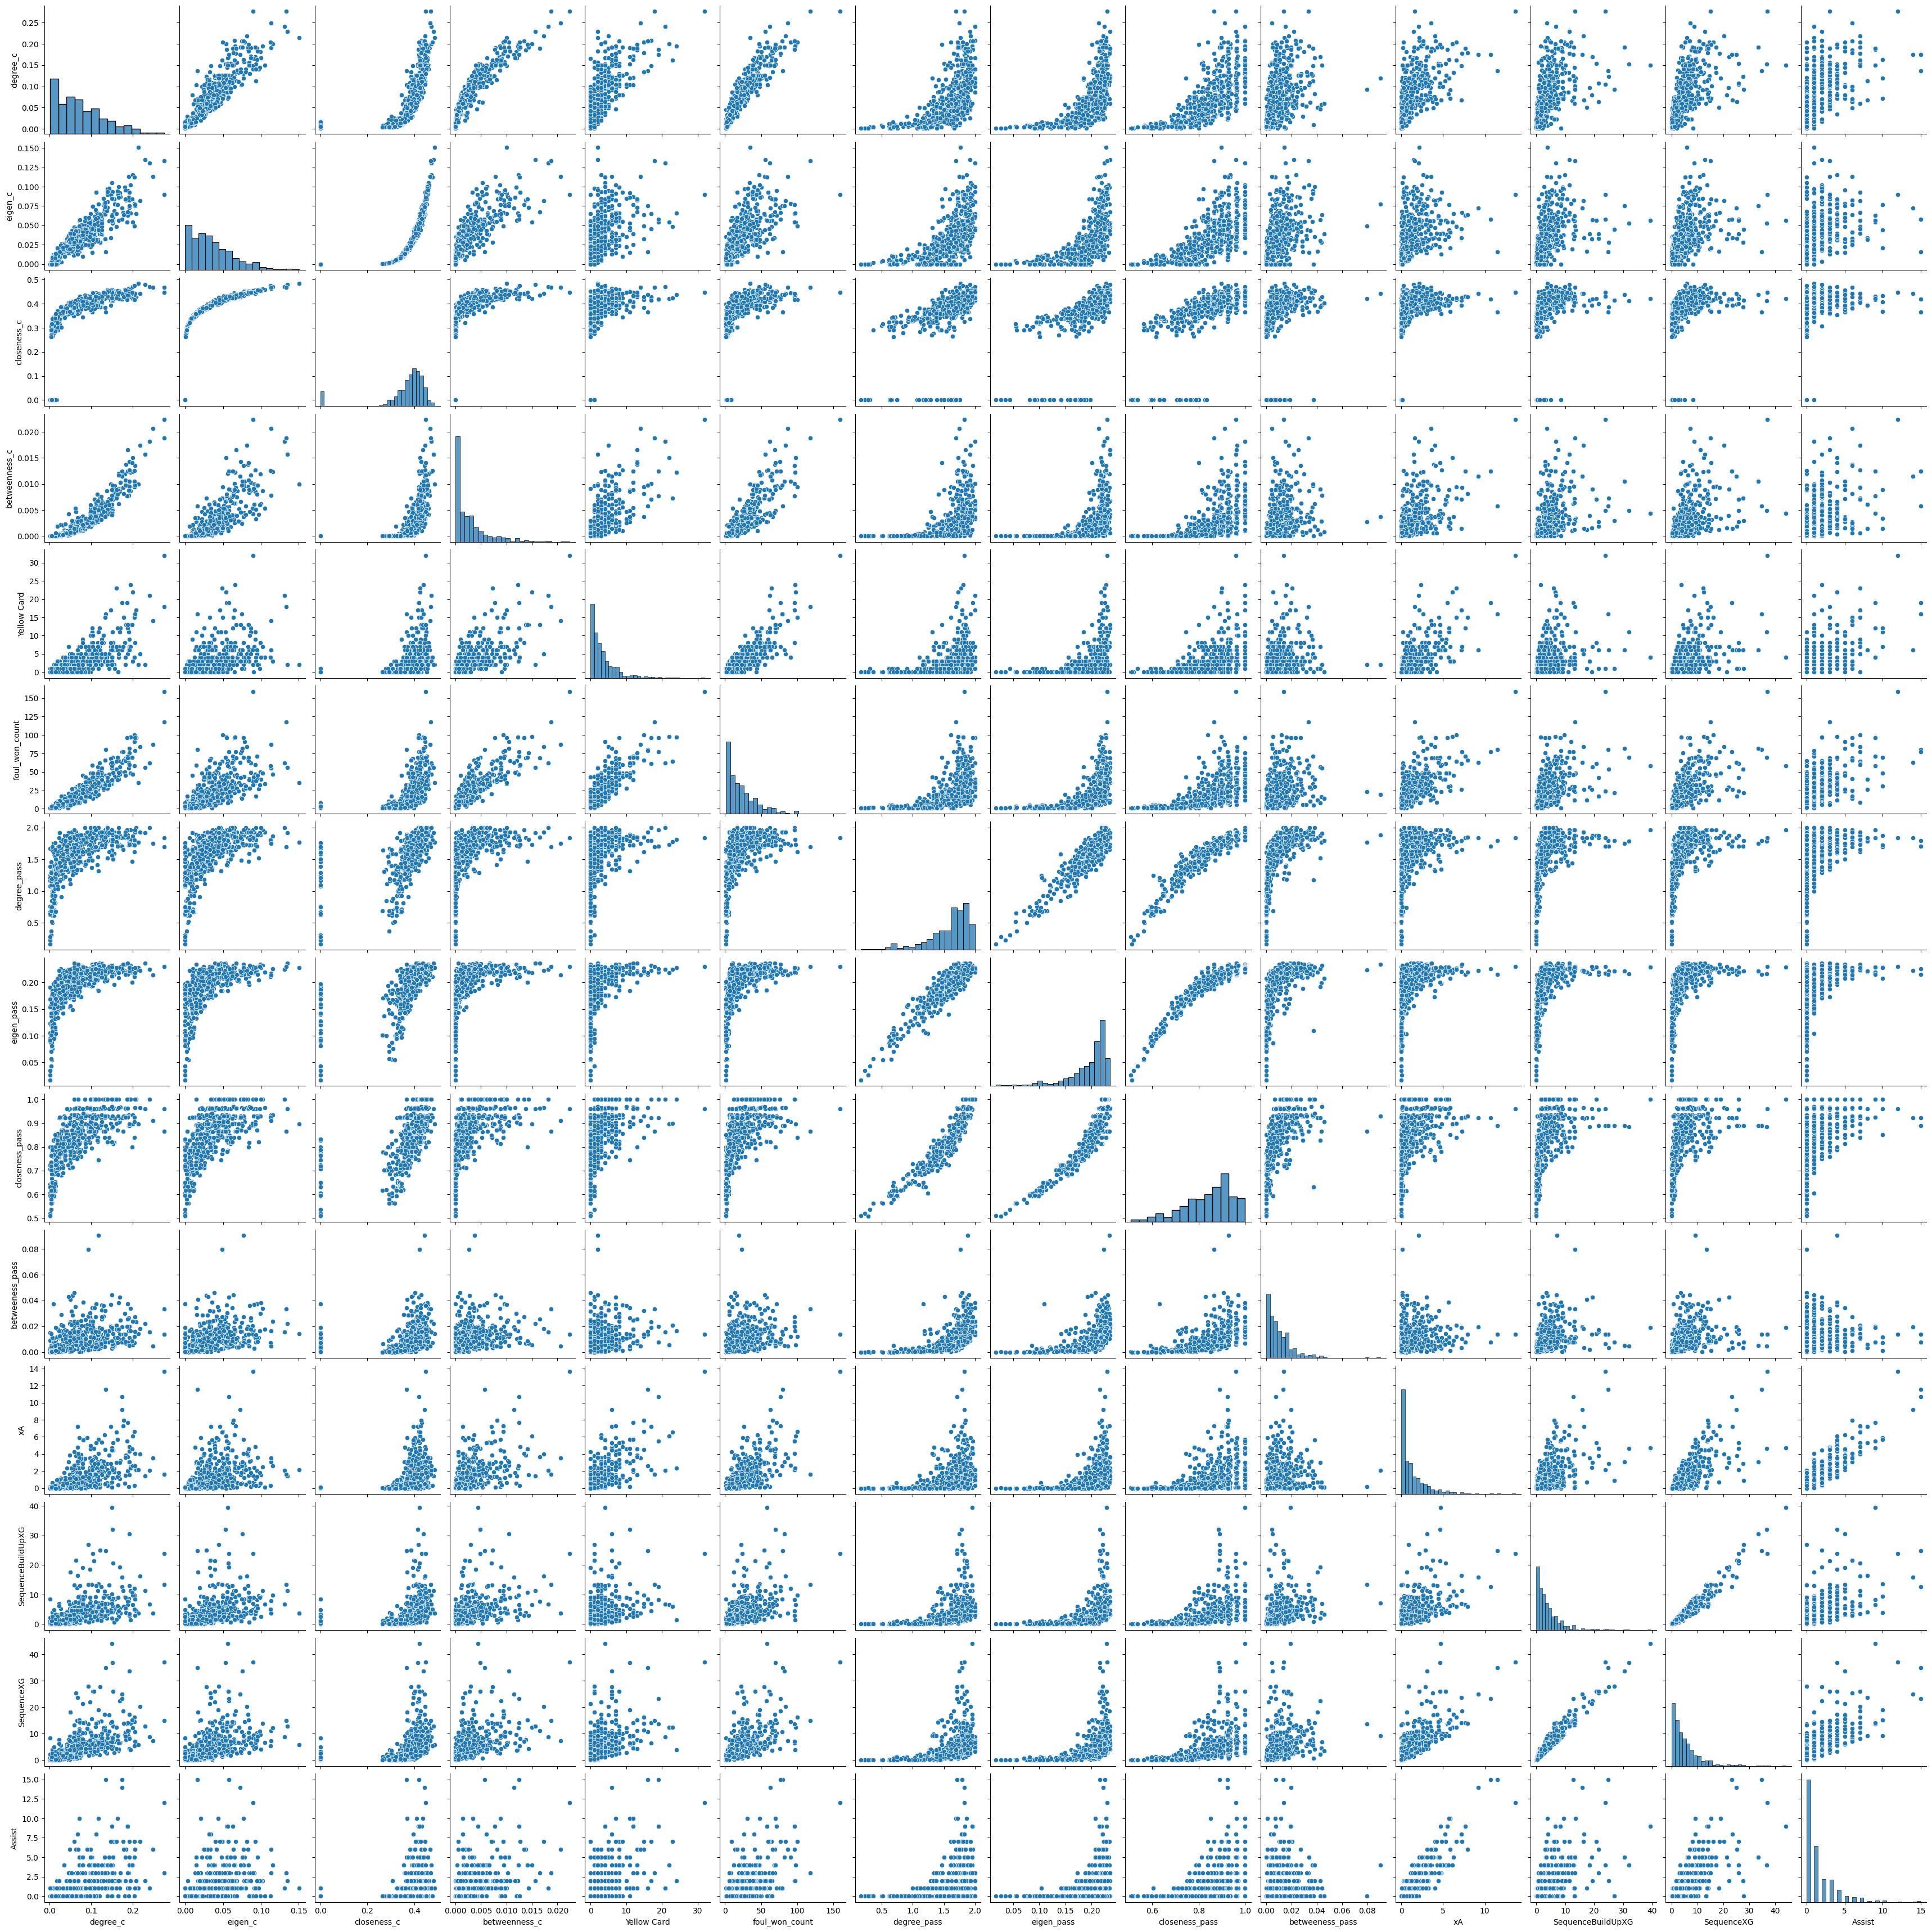

In [18]:
sns.pairplot(by_player)

### Transforming the Data

In [20]:

from sklearn.preprocessing import MinMaxScaler

# Select only numerical columns from the DataFrame
numerical_cols = by_player.select_dtypes(include=['number']).columns

# Apply Min-Max scaling to the numerical columns
scaler_pass = MinMaxScaler(feature_range=(0, 10))  # Specify range (0, 10)
scaled_pass = pd.DataFrame(scaler_pass.fit_transform(by_player[numerical_cols]), columns=numerical_cols)


In [21]:
transformed = scaled_pass.copy()
transformed.columns

Index(['degree_c', 'eigen_c', 'closeness_c', 'betweenness_c', 'Yellow Card',
       'foul_won_count', 'degree_pass', 'eigen_pass', 'closeness_pass',
       'betweeness_pass', 'xA', 'SequenceBuildUpXG', 'SequenceXG', 'Assist'],
      dtype='object')

In [25]:

from scipy.stats import boxcox



# Log transform for positive-skewed and negative-skewed columns
for col in numerical_cols:
    if col in ['degree_c', 'eigen_c','betweenness_c','Yellow Card', 'foul_won_count','betweenness_pass','xA', 'SequenceBuildUpXG', 'SequenceXG', 'Assist']:
        # Log transform for positive-skewed columns
        transformed[col] = np.log(transformed[col] + 1)  # +1 to handle zero values
    else:

        # Box-Cox dönüşümü
        transformed_data, lambda_value = boxcox(transformed[col]+1)
        transformed[col] = transformed_data
        print(col,'best lambda: ',lambda_value)
        


closeness_c best lambda:  3.058255973889186
degree_pass best lambda:  3.094096671106092
eigen_pass best lambda:  3.9104998584502595
closeness_pass best lambda:  1.7763442530713323
betweeness_pass best lambda:  -0.49539555332919327


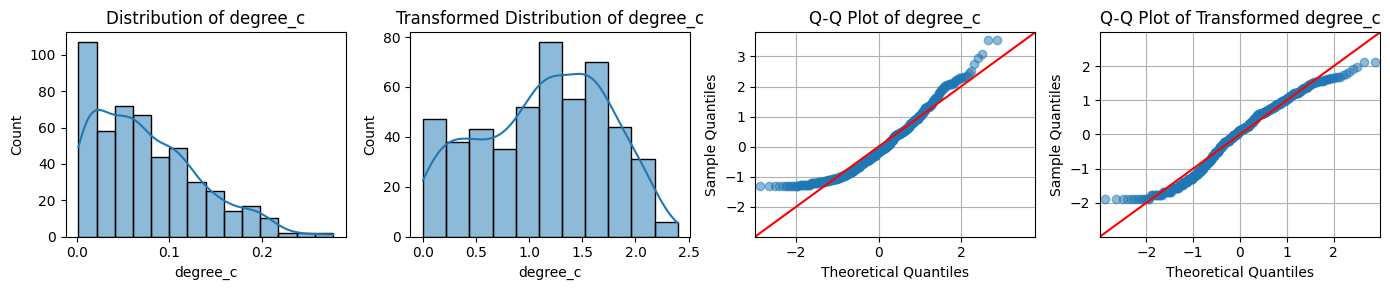

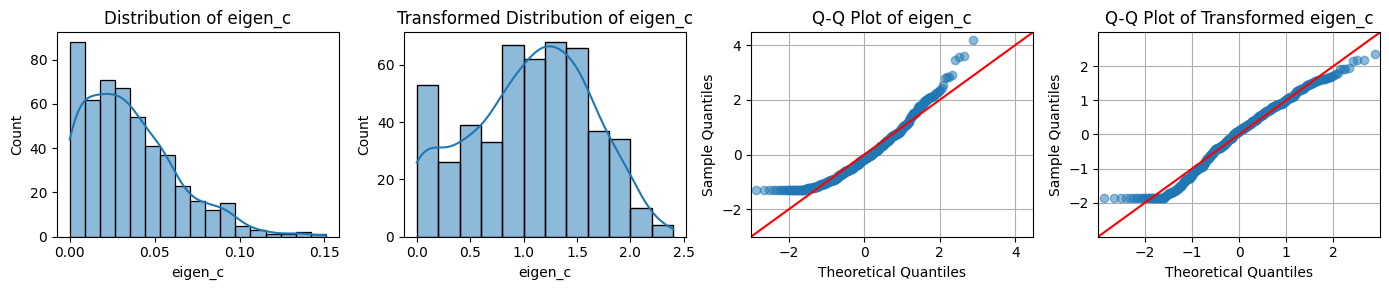

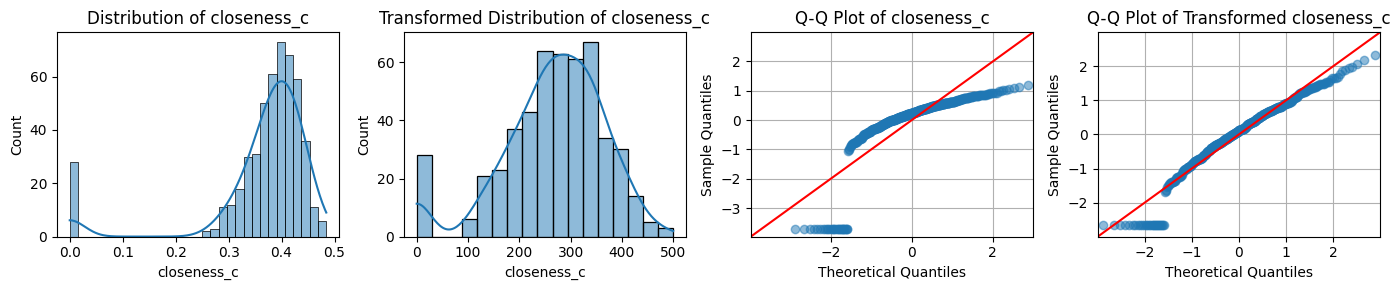

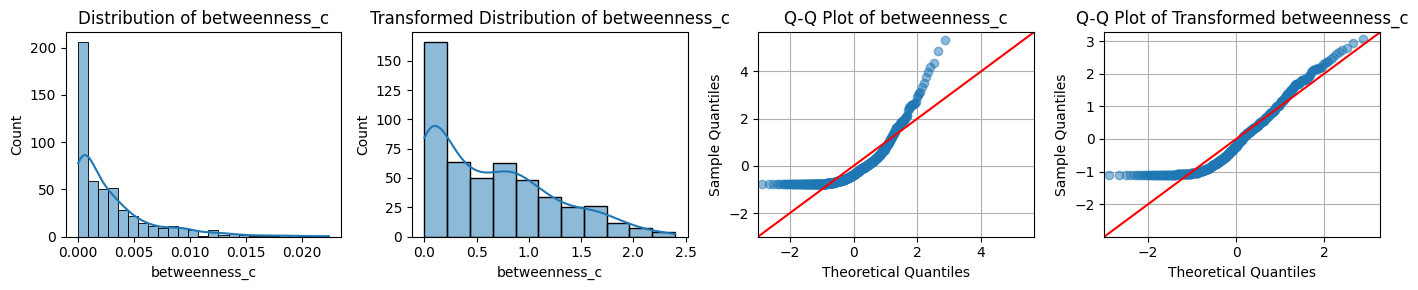

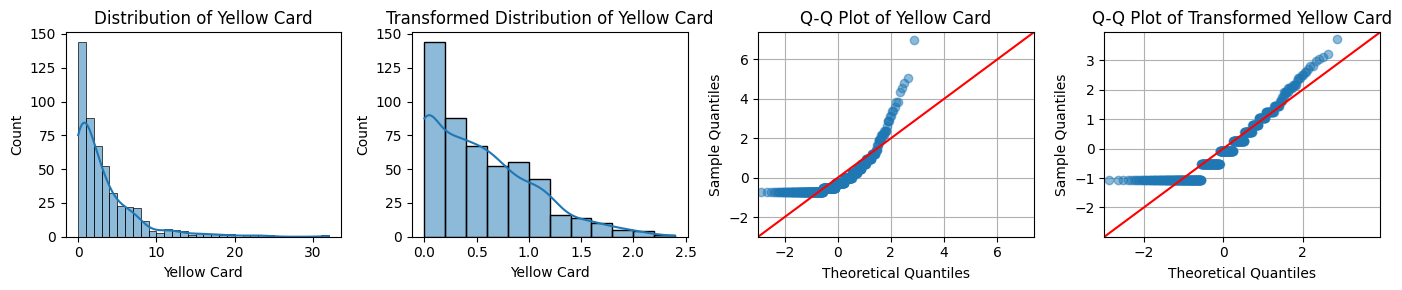

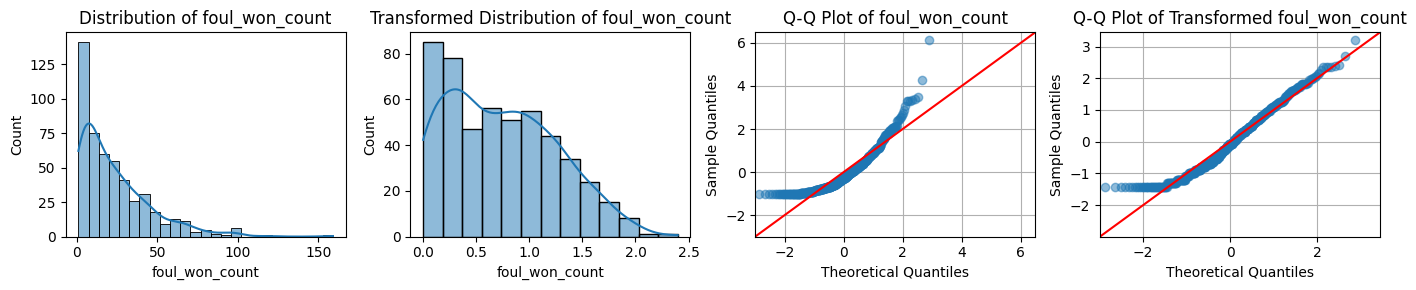

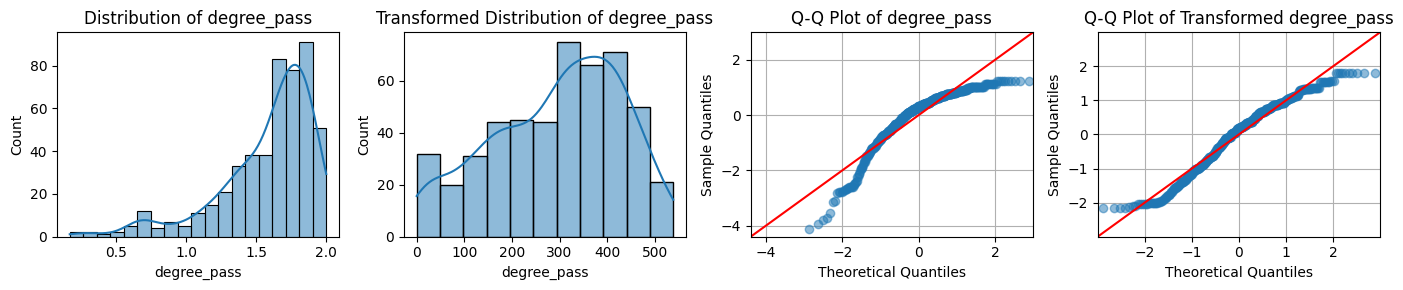

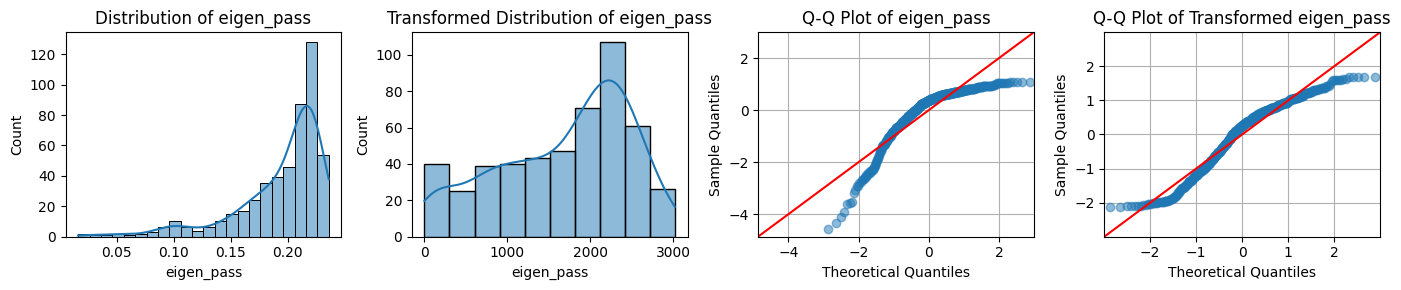

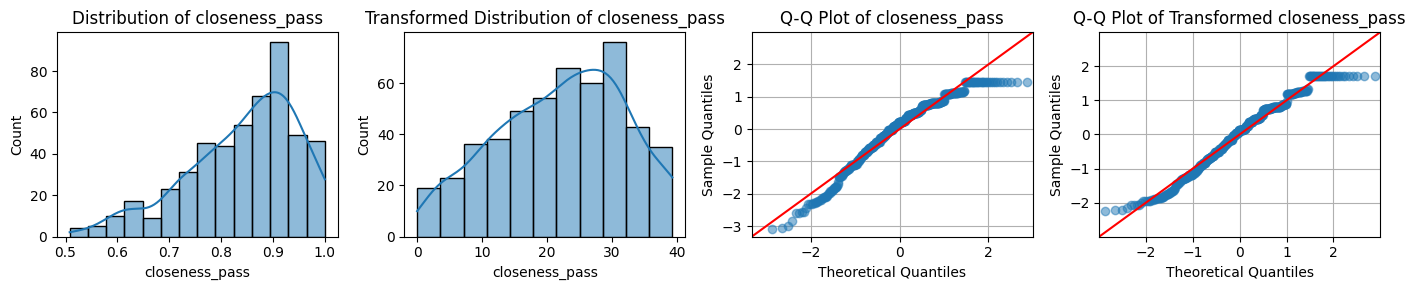

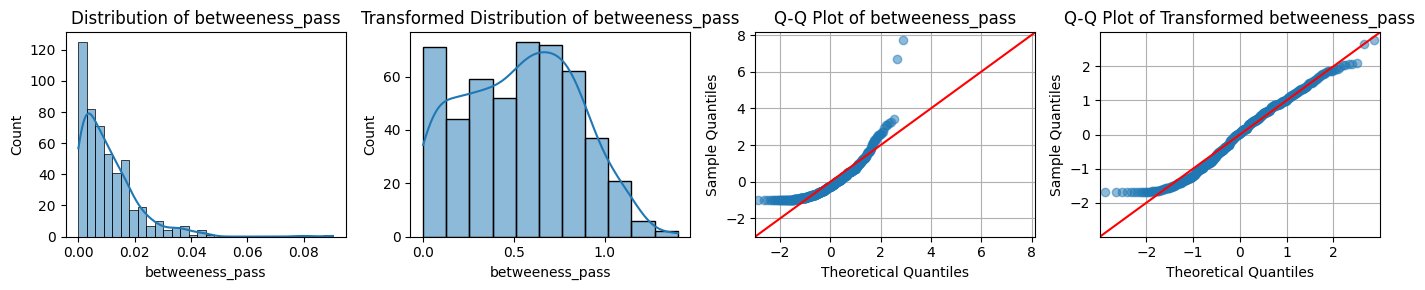

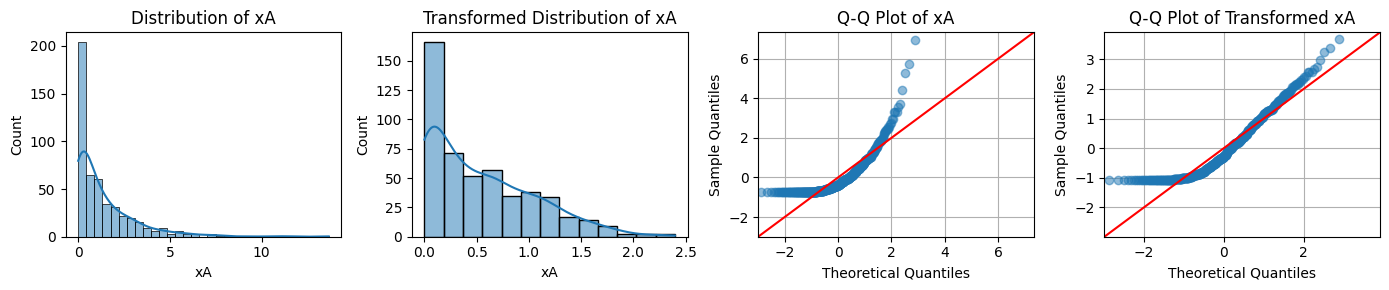

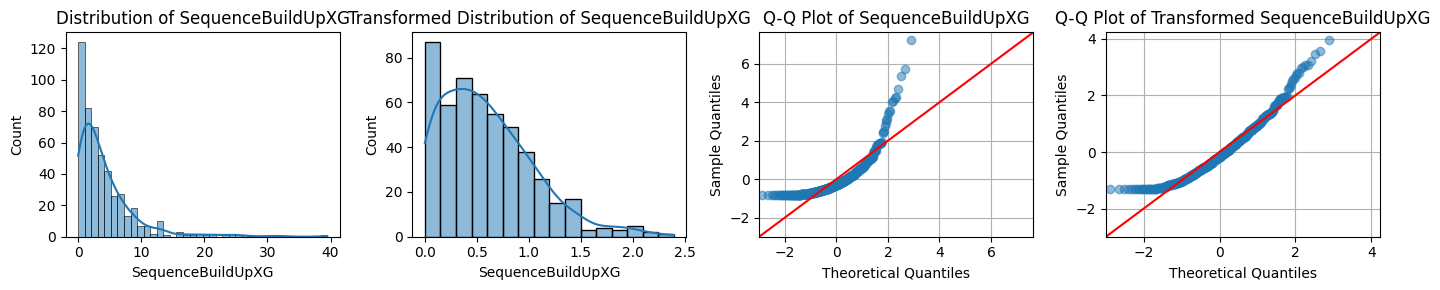

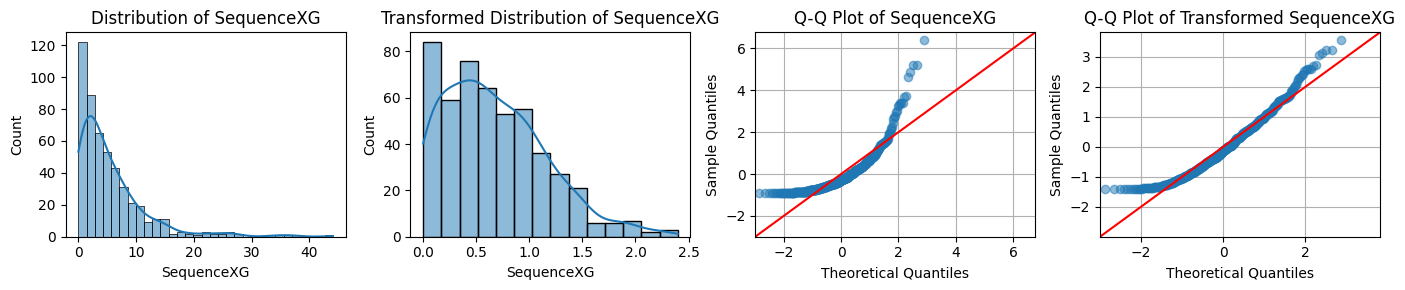

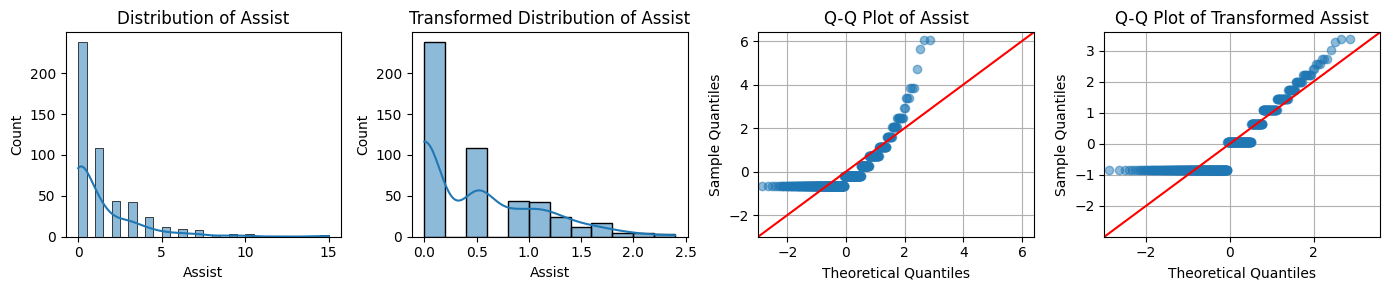

In [26]:

import statsmodels.api as sm

# Loop through numerical columns
for col in numerical_cols:    
    # Create subplots: 1 row, 2 columns
    fig, axes = plt.subplots(1, 4, figsize=(14, 3))
    # Plot 1: Distribution Plot
    sns.histplot(by_player[col], kde=True, ax=axes[0])
    axes[0].set_title(f"Distribution of {col}")
    axes[0].set_xlabel(col)
    # Plot 1: Distribution Plot
    sns.histplot(transformed[col], kde=True, ax=axes[1])
    axes[1].set_title(f"Transformed Distribution of {col}")
    axes[1].set_xlabel(col)


    # Plot 2: Q-Q Plot with Confidence Intervals
    sm.qqplot(by_player[col], line='45', alpha=0.5, fit=True, ax=axes[2])
    axes[2].set_title(f"Q-Q Plot of {col}")
    axes[2].grid(True)


    # Plot 2: Q-Q Plot with Confidence Intervals
    sm.qqplot(transformed[col], line='45', alpha=0.5, fit=True, ax=axes[3])
    axes[3].set_title(f"Q-Q Plot of Transformed {col}")
    axes[3].grid(True)


    # Adjust layout and show plots
    plt.tight_layout()
    plt.show()

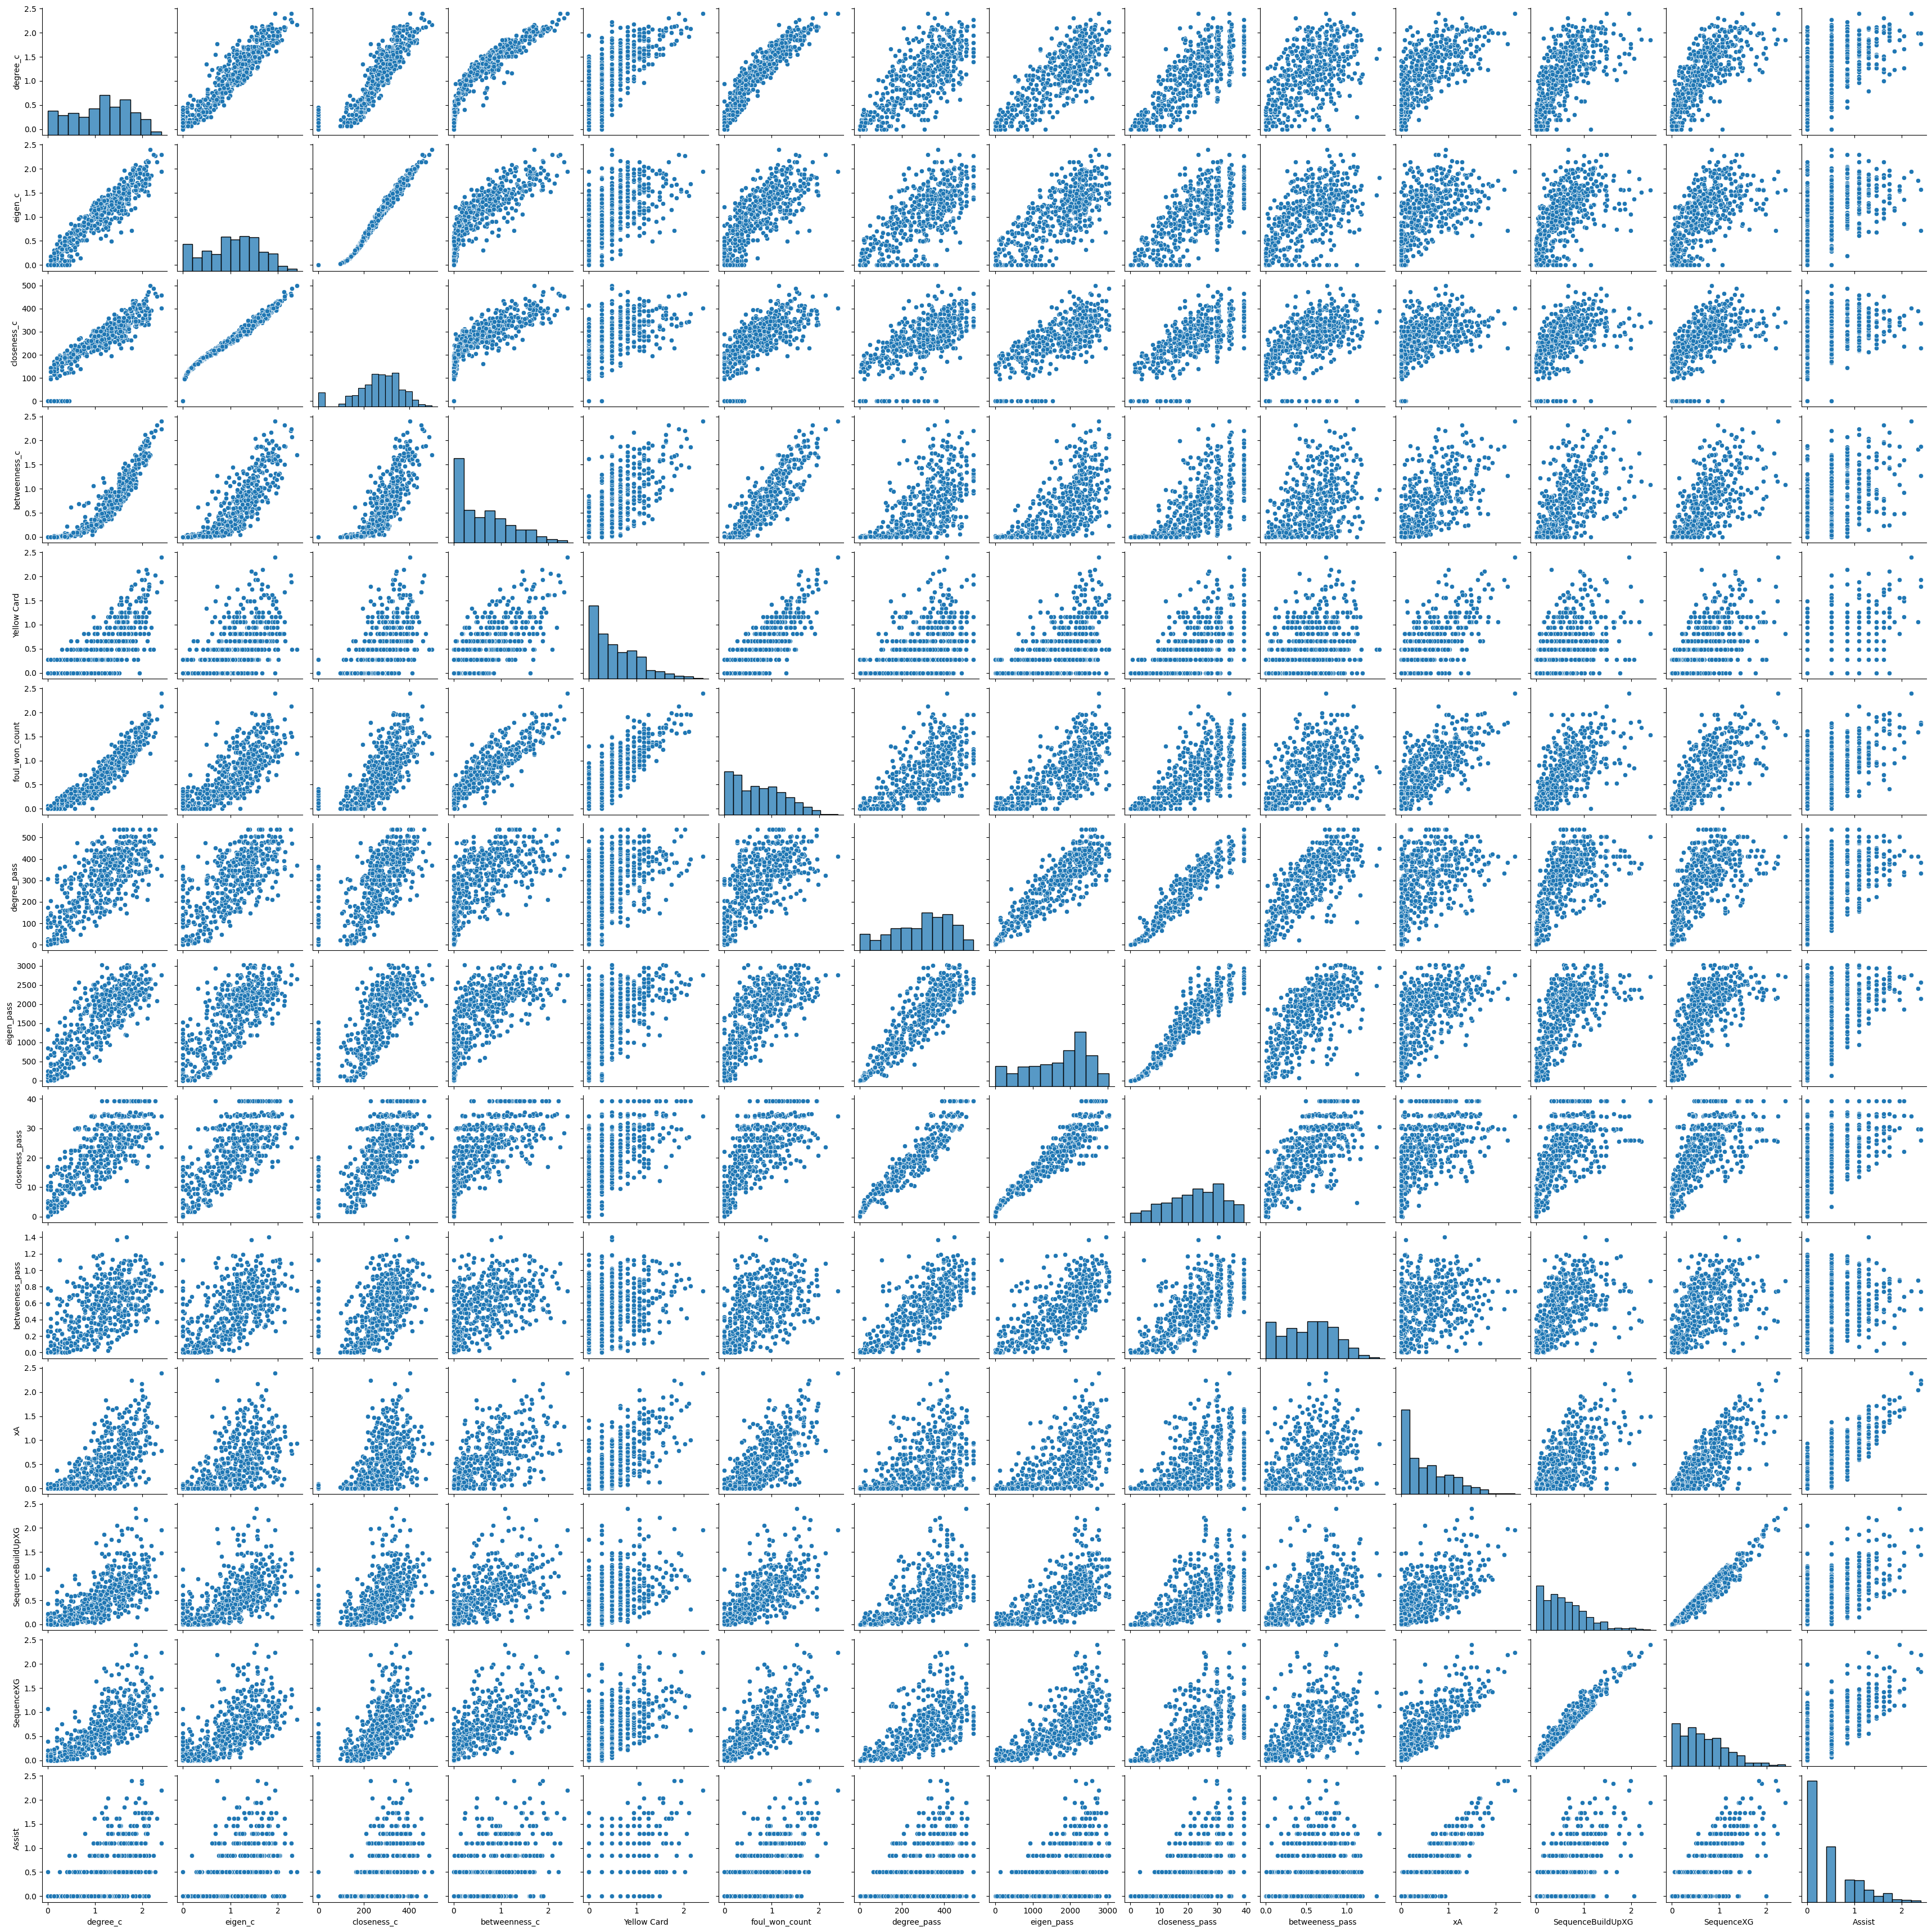

In [27]:
sns.pairplot(transformed[numerical_cols])
plt.show()


### Analyzing the Correlation 

As seen below, there is a strong correlation between foul-related centralities, passing centralities, and goal-related statistics. This suggests that fouls are mostly directed at players who play key roles in passing. Another standout correlation is that fouls resulting in yellow cards are often committed against players with high xA. This indicates that players who pose a high assist threat tend to receive more aggressive or tactical fouls.

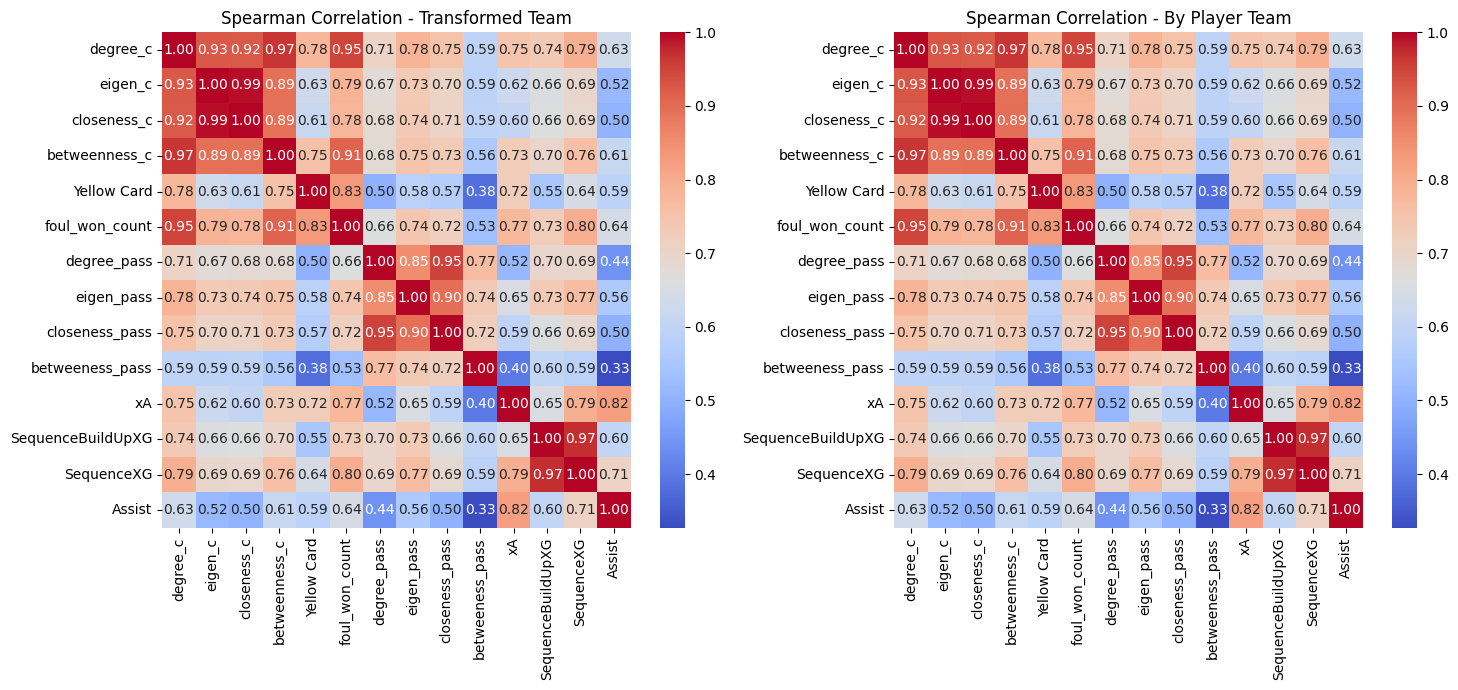

In [30]:

# Create subplots for side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(15, 7))  # 1 row, 2 columns

# First heatmap: transformed_team
sns.heatmap(
    transformed[numerical_cols].corr(method="spearman"),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    ax=axes[0]
)
axes[0].set_title("Spearman Correlation - Transformed Team")

# Second heatmap: by_player_team
sns.heatmap(
    by_player[numerical_cols].corr(method="spearman"),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    ax=axes[1]
)
axes[1].set_title("Spearman Correlation - By Player Team")

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


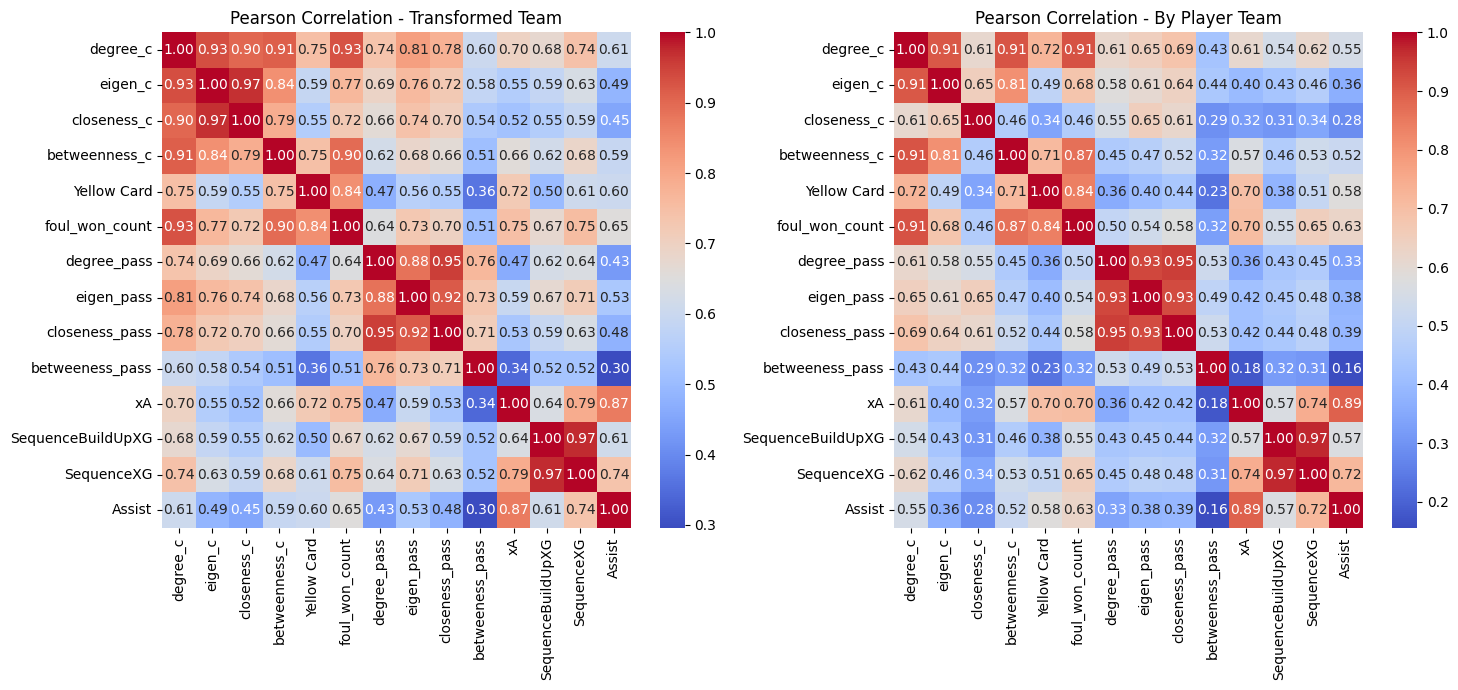

In [31]:

# Create subplots for side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(15, 7))  # 1 row, 2 columns

# First heatmap: transformed_team
sns.heatmap(
    transformed[numerical_cols].corr(method="pearson"),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    ax=axes[0]
)
axes[0].set_title("Pearson Correlation - Transformed Team")

# Second heatmap: by_player_team
sns.heatmap(
    by_player[numerical_cols].corr(method="pearson"),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    ax=axes[1]
)
axes[1].set_title("Pearson Correlation - By Player Team")

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


### Visualising the Relations

In [33]:
def scatter_linear(x, y):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy.optimize import curve_fit

    # Define the linear function
    def linear_func(x, a, b):
        return a * x + b

    # Fit the linear model to the data
    x_data = x
    y_data = y
    popt, pcov = curve_fit(linear_func, x_data, y_data)  # popt contains [a, b]

    # Extract the coefficients and their uncertainties
    a_fit, b_fit = popt
    perr = np.sqrt(np.diag(pcov))  # Standard deviation of the parameters
    a_err, b_err = perr

    print(f"Fitted Parameters: a = {a_fit:.2f} ± {a_err:.2f}, b = {b_fit:.2f} ± {b_err:.2f}")

    # Generate fitted values
    x_fit = np.linspace(x_data.min(), x_data.max(), 100)
    y_fit = linear_func(x_fit, a_fit, b_fit)

    # Calculate prediction intervals
    n = len(y_data)  # Number of data points
    p = len(popt)    # Number of parameters
    alpha = 0.05     # 95% confidence level
    dof = max(0, n - p)  # Degrees of freedom
    t_val = 1.96     # For 95% confidence level (approximation)

    # Residuals
    residuals = y_data - linear_func(x_data, *popt)
    std_err = np.sqrt(np.sum(residuals**2) / dof)

    # Prediction interval bounds
    ci_upper = y_fit + t_val * std_err
    ci_lower = y_fit - t_val * std_err
    
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # Plot the data, fit, and confidence bands
    axes[0].scatter(x_data, y_data, label='Data Points', color='blue', alpha=0.5)  # Corrected
    axes[0].plot(x_fit, y_fit, label=f'Linear Fit: y = {a_fit:.2f} * x + {b_fit:.2f}', color='red')
    axes[0].fill_between(x_fit, ci_lower, ci_upper, color='red', alpha=0.2, label='95% Prediction Interval')
    axes[0].set_title("Linear Fit with Prediction Interval")
    axes[0].set_xlabel(x.name if hasattr(x, 'name') else 'X')
    axes[0].set_ylabel(y.name if hasattr(y, 'name') else 'Y')
    axes[0].legend()

    # Plot the residuals
    sns.histplot(residuals, kde=True, ax=axes[1])
    axes[1].set_title("Distribution of Residuals")
    axes[1].set_xlabel('Residuals')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()



def scatter_exp(x, y):    # Define the exponential function
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy.optimize import curve_fit

    def exponential_func(x, a, b):
        return a * np.exp(b * x)

    # Fit the exponential model to the data
    x_data = x
    y_data = y
    popt, pcov = curve_fit(exponential_func, x_data, y_data)  # popt contains [a, b]

    # Extract the coefficients and their uncertainties
    a_fit, b_fit = popt
    perr = np.sqrt(np.diag(pcov))  # Standard deviation of the parameters
    a_err, b_err = perr

    print(f"Fitted Parameters: a = {a_fit:.2f} ± {a_err:.2f}, b = {b_fit:.2f} ± {b_err:.2f}")
    
    # Generate fitted values
    x_fit = np.linspace(x_data.min(), x_data.max(), 100)
    y_fit = exponential_func(x_fit, a_fit, b_fit)

    # Calculate prediction intervals
    n = len(y_data)  # Number of data points
    p = len(popt)    # Number of parameters
    alpha = 0.05     # 95% confidence level
    dof = max(0, n - p)  # Degrees of freedom
    t_val = 1.96     # For 95% confidence level (approximation)

    # Residuals
    residuals = y_data - exponential_func(x_data, *popt)
    #print(residuals.min(),residuals.max(),residuals.count())
    std_err = np.sqrt(np.sum(residuals**2) / dof)

    # Prediction interval bounds
    ci_upper = y_fit + t_val * std_err
    ci_lower = y_fit - t_val * std_err

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # Residual plot
    sns.histplot(residuals, kde=True, ax=axes[1])
    axes[1].set_title("Distribution of Residuals")
    axes[1].set_xlabel('Residuals')
    
    # Data and fit plot
    axes[0].scatter(x_data, y_data, label='Data Points', color='blue', alpha=0.5)  # Corrected
    axes[0].plot(x_fit, y_fit, label=f'Exponential Fit: y = {a_fit:.2f} * exp({b_fit:.2f} * x)', color='red')
    axes[0].fill_between(x_fit, ci_lower, ci_upper, color='red', alpha=0.2, label='95% Prediction Interval')
    axes[0].set_title("Exponential Fit with Prediction Interval")
    axes[0].set_xlabel(x.name if hasattr(x, 'name') else 'X')
    axes[0].set_ylabel(y.name if hasattr(y, 'name') else 'Y')
    axes[0].legend()

    # Adjust layout and show
    plt.tight_layout()
    plt.show()


Fitted Parameters: a = 0.00 ± 0.00, b = 24.67 ± 1.57


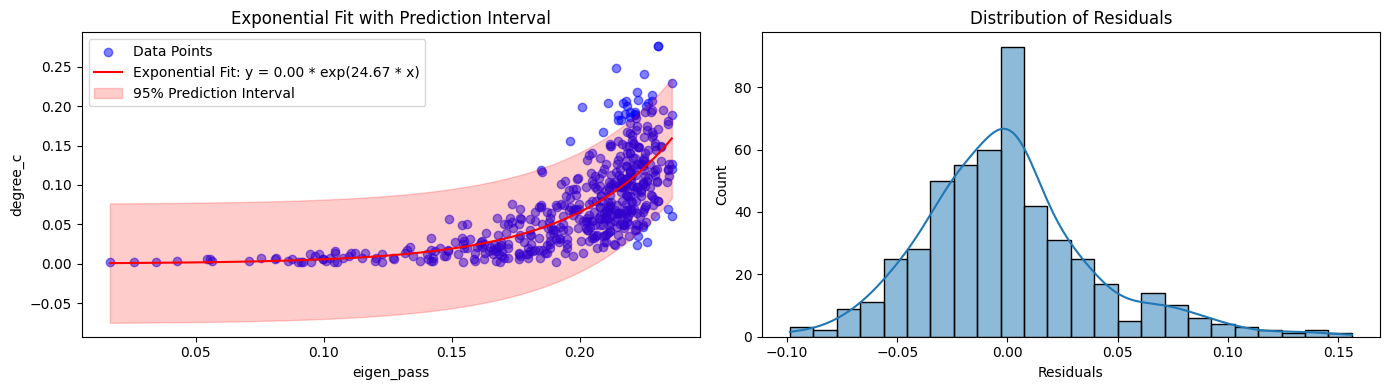

In [34]:
scatter_exp(by_player['eigen_pass'],by_player['degree_c']) 

Fitted Parameters: a = 0.00 ± 0.00, b = 0.11 ± 0.04


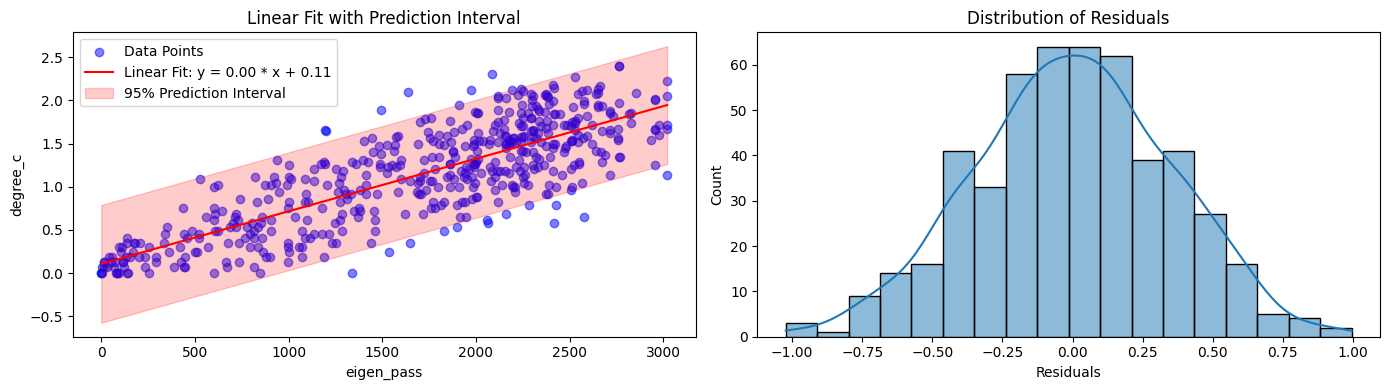

In [35]:
scatter_linear(transformed['eigen_pass'],transformed['degree_c']) 

Fitted Parameters: a = 18.13 ± 0.74, b = 0.17 ± 0.01


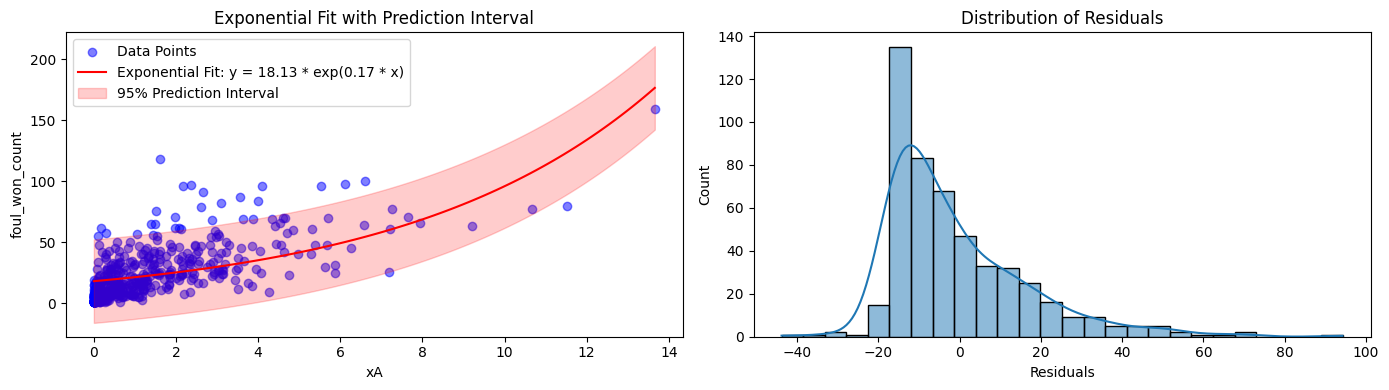

In [36]:
scatter_exp(by_player['xA'],by_player['foul_won_count']) 

Fitted Parameters: a = 0.76 ± 0.03, b = 0.32 ± 0.02


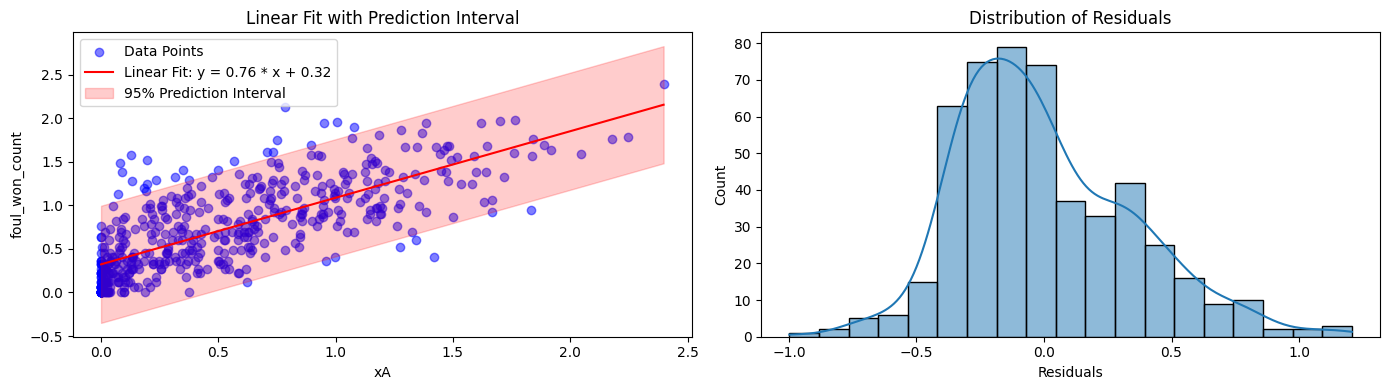

In [37]:
scatter_linear(transformed['xA'],transformed['foul_won_count']) 

## **Visualization**

In [165]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm


def network_viz(df, G):
    # Compute player positions
    positions = df[['player', 'x', 'y']]
    # Calculate average positions
    average_positions_df = positions.groupby('player')[['x', 'y']].mean()

    # Convert to dictionary for NetworkX
    average_positions = average_positions_df.apply(lambda row: (row['x'], row['y']), axis=1).to_dict()

    # Node size calculation (based on degree centrality)
    centrality = nx.degree_centrality(G)  # Calculate centrality
    min_size, max_size = 10, 100  # Desired size range
    min_centrality = min(centrality.values(), default=0)
    max_centrality = max(centrality.values(), default=1)

    node_sizes = [
        min_size + ((centrality[node] - min_centrality) / (max_centrality - min_centrality)) * (max_size - min_size)
        for node in G.nodes
    ]

    # Node color calculation (based on SequenceXG)
    grouped = df.groupby('player')['shot_statsbomb_xg_shotFromPass_passing'].sum().reset_index()
    grouped.set_index('player', inplace=True)
    norm = mcolors.Normalize(vmin=grouped['shot_statsbomb_xg_shotFromPass_passing'].min(), vmax=grouped['shot_statsbomb_xg_shotFromPass_passing'].max())
    colormap = cm.viridis
    node_colors = [
        mcolors.to_hex(colormap(norm(grouped.loc[node]['shot_statsbomb_xg_shotFromPass_passing']))) if node in grouped.index else '#808080'
        for node in G.nodes
    ]

    # Get edge weights for visualization (scaled for thickness)
    weights = [data.get('weight', 1) * 0.01 for _, _, data in G.edges(data=True)]

    # Visualization
    fig, ax = plt.subplots(figsize=(12, 8))

    # Add background field image
    try:
        field_image = plt.imread("pitch.png")  # Path to the football field image
        ax.imshow(field_image, extent=[0, 120, 80, 0], zorder=0)  # Adjust to field dimensions
    except FileNotFoundError:
        print("Field image not found. Please ensure 'pitch.png' is in the correct path.")

    # Draw nodes and edges
    nx.draw_networkx_nodes(G, average_positions, node_size=node_sizes, node_color=node_colors, ax=ax, alpha=0.9)
    nx.draw_networkx_labels(G, average_positions, font_size=8, font_color="black", ax=ax)
    nx.draw_networkx_edges(
        G,
        average_positions,
        edge_color="gray",
        width=weights,
        arrowstyle='->',
        arrowsize=10,
        ax=ax
    )

    # Add colorbar for node colors
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.03, pad=0.04)
    cbar.set_label('SequenceXG', rotation=90, labelpad=10)

    # Axis settings
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 80)
    ax.set_axis_off()  # Hide axes
    ax.invert_yaxis()  # Invert y-axis to match football field orientation

    plt.title("Passing Network")
    plt.show()





In [ ]:
import gravis as gv
import networkx as nx
import pandas as pd

def network_viz_gravis(df, G):
    # Compute player positions
    positions = df[['player', 'x', 'y']]
    average_positions_df = positions.groupby('player')[['x', 'y']].mean()

    # Convert to dictionary for NetworkX
    average_positions = average_positions_df.apply(lambda row: (row['x'], row['y']), axis=1).to_dict()

    # Node size calculation (based on degree centrality)
    centrality = nx.degree_centrality(G)
    min_size, max_size = 10, 200  # Desired size range
    min_centrality = min(centrality.values(), default=0)
    max_centrality = max(centrality.values(), default=1)

    node_sizes = {
        node: min_size + ((centrality[node] - min_centrality) / (max_centrality - min_centrality)) * (max_size - min_size)
        for node in G.nodes
    }

    # Node color calculation (based on SequenceXG)
    grouped = df.groupby('player')['shot_statsbomb_xg_shotFromPass_passing'].sum().reset_index()
    grouped.set_index('player', inplace=True)
    norm = mcolors.Normalize(vmin=grouped['shot_statsbomb_xg_shotFromPass_passing'].min(),
                              vmax=grouped['shot_statsbomb_xg_shotFromPass_passing'].max())
    colormap = cm.viridis

    node_colors = {
        node: mcolors.to_hex(colormap(norm(grouped.loc[node]['shot_statsbomb_xg_shotFromPass_passing']))) if node in grouped.index else '#808080'
        for node in G.nodes
    }

    # Add node attributes for size and color
    for node in G.nodes:
        G.nodes[node]['size'] = node_sizes.get(node, 10)  # Default size is 10
        G.nodes[node]['color'] = node_colors.get(node, '#808080')  # Default color is gray

    for edge in G.edges:
         G.edges[edge]['size'] = G.edges[edge]["weight"]  # fau lmiktarı



    # # Convert to gravis visualization
    return gv.d3(G)

    # Display the graph interactively

# Example usage
# df should be your data frame, and G your NetworkX graph
network_viz_gravis(by_player, all_teams_graph)


In [51]:
all_teams_graph

In [57]:

all_teams_dataframe

match_id      competition   home_team  home_score away_team  \
0       3825848  Spain - La Liga  Levante UD           2     Eibar   
1       3825848  Spain - La Liga  Levante UD           2     Eibar   
2       3825848  Spain - La Liga  Levante UD           2     Eibar   
3       3825848  Spain - La Liga  Levante UD           2     Eibar   
4       3825848  Spain - La Liga  Levante UD           2     Eibar   
...         ...              ...         ...         ...       ...   
11569    266557  Spain - La Liga   Barcelona           1  Valencia   
11570    266557  Spain - La Liga   Barcelona           1  Valencia   
11571    266557  Spain - La Liga   Barcelona           1  Valencia   
11572    266557  Spain - La Liga   Barcelona           1  Valencia   
11573    266557  Spain - La Liga   Barcelona           1  Valencia   

       away_score                   referee        team  possession  \
0               2                      None  Levante UD          10   
1               2                      None       Eibar          12   
2               2                      None       Eibar          29   
3               2                      None  Levante UD          31   
4               2                      None  Levante UD          36   
...           ...                       ...         ...         ...   
11569           2  David Fernández Borbalan   Barcelona         147   
11570           2  David Fernández Borbalan    Valencia         155   
11571           2  David Fernández Borbalan   Barcelona         158   
11572           2  David Fernández Borbalan    Valencia         169   
11573           2  David Fernández Borbalan   Barcelona         177   

       possession_time  ...  team_foul_commitedJ  \
0               16.613  ...                Eibar   
1               15.037  ...           Levante UD   
2                4.279  ...           Levante UD   
3                5.858  ...                Eibar   
4               18.309  ...                Eibar   
...                ...  ...                  ...   
11569            5.032  ...             Valencia   
11570           54.213  ...            Barcelona   
11571           10.282  ...             Valencia   
11572            4.204  ...            Barcelona   
11573           27.059  ...             Valencia   

      foul_committed_advantage_foul_commitedJ  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   
...                                       ...   
11569                                     NaN   
11570                                     NaN   
11571                                     NaN   
11572                                     NaN   
11573                                     NaN   

      foul_committed_card_foul_commitedJ Yellow Card Second Yellow  Red Card  \
0                                   None           0             0         0   
1                                   None           0             0         0   
2                                   None           0             0         0   
3                                   None           0             0         0   
4                                   None           0             0         0   
...                                  ...         ...           ...       ...   
11569                               None           0             0         0   
11570                               None           0             0         0   
11571                               None           0             0         0   
11572                        Yellow Card           1             0         0   
11573                               None           0             0         0   

       degree_c   eigen_c closeness_c betweenness_c  
0      0.097276  0.055330    0.430418      0.003328  
1      0.180934  0.099004    0

In [53]:
by_player

player  degree_c   eigen_c  closeness_c  \
0                   Abdoul Karim Yoda  0.036965  0.019553     0.368882   
1                  Abdoulaye Doucouré  0.050584  0.035057     0.401413   
2           Abraham González Casanova  0.042802  0.027954     0.378727   
3         Adalberto Peñaranda Maestre  0.155642  0.084142     0.449672   
4    Aderllan Leandro de Jesus Santos  0.029183  0.015493     0.354257   
..                                ...       ...       ...          ...   
494              Íñigo Lekue Martínez  0.042802  0.023033     0.382631   
495            Íñigo Martínez Berridi  0.097276  0.053548     0.423988   
496               Óliver Torres Muñoz  0.048638  0.019236     0.368882   
497          Óscar Esau Duarte Gaitán  0.050584  0.039700     0.404102   
498             Óscar de Marcos Arana  0.110895  0.058469     0.430802   

     betweenness_c  Yellow Card  Red Card  player_foul_commitedJ  \
0         0.000250            2         0                     10   
1         0.000446            2         0                      8   
2         0.000466            2         0                      9   
3         0.008320            6         0                     41   
4         0.000307            1         0                      6   
..             ...          ...       ...                    ...   
494       0.000610            0         0                     10   
495       0.003536            3         0                     27   
496       0.000963            1         0                     17   
497       0.000662            1         0                      5   
498       0.003792            2         0                     23   

     degree_c_passing  eigen_c_passing  closeness_c_passing  \
0            1.615385         0.210081             0.866667   
1            1.370370         0.171872             0.750000   
2            1.560000         0.189383             0.833333   
3            1.592593         0.196177             0.818182   
4            1.655172         0.188509             0.828571   
..                ...              ...                  ...   
494          1.875000         0.221813             0.960000   
495          1.730769         0.211547             0.866667   
496          1.833333         0.224816             0.923077   
497          1.440000         0.176130             0.781250   
498          1.958333         0.225568             1.000000   

     betweenness_c_passing  shot_statsbomb_xg_shotFromPass_passing  \
0                 0.002409                                0.434431   
1                 0.001477                                0.615640   
2                 0.002851                                2.334519   
3                 0.004457                                2.263150   
4                 0.029203                                0.030815   
..                     ...                                     ...   
494               0.007572                                0.585020   
495               0.008227                                0.286110   
496               0.009136                                1.185552   
497               0.003070                                0.069180   
498               0.016095                                1.588619   

     SequenceBuildUpXG_passing  shot_outcome_shotFromPass_binary_passing  
0                     2.249535                                         0  
1                     2.097704                                         2  
2                     4.195373                                         1  
3                     0.617804                                         3  
4                     1.803040                                         0  
..                         ...                                       ...  
494                   1.930899                                         0  
495                   7.190235                                         0  
496                   2.849200                      

In [63]:
con.close

<bound method PyCapsule.close of <duckdb.duckdb.DuckDBPyConnection object at 0x107588a30>>